In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [2]:

def rk4_step(f,h,y0,x0):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0)
    k2 = h * f(y0 + k1/2., x0 + h/2.)
    k3 = h * f(y0 + k2/2., x0 + h/2.)
    k4 = h * f(y0 + k3, x0 + h)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)



In [6]:
def f_1x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(x3-x1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 
def f_1y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(y3-y1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 


def f_2x(x1, x2, x3, y1, y2, y3):
    return G*m1*(x1-x2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(x3-x2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 
def f_2y(x1, x2, x3, y1, y2, y3):
    return G*m1*(y1-y2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(y3-y2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 


def f_3x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(x1-x3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 
def f_3y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(y1-y3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 



In [7]:
def f_1(pos_vel, x0):
    a_x1 = f_1x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x2 = f_2x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x3 = f_3x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y1 = f_1y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y2 = f_2y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y3 = f_3y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    return np.array([pos_vel[1], a_x1, pos_vel[3], a_x2, pos_vel[5], a_x3, pos_vel[7], a_y1,pos_vel[9], a_y2,pos_vel[11], a_y3])




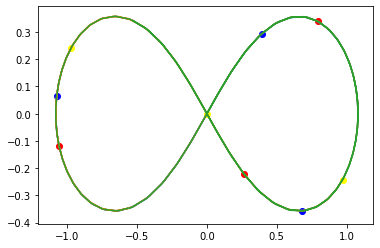

In [18]:
x_max = 10
x0 = 0
h = 0.1
m1 = 1
m2 = 1
m3 = 1
G = 1
x1=-0.97000436
y1=0.24308753
vx1=-0.46620368
vy1=-0.43236573
x2=0.97000436
y2=-0.24308753
vx2=-0.46620368
vy2=-0.43236573
x3=0.0
y3=0.0
vx3=0.93240737
vy3=0.86473146
Z = []
X0 = []
pos_vel=np.array([x1,vx1,x2,vx2,x3,vx3,y1,vy1,y2,vy2,y3,vy3])
while x0 < x_max:
    Z.append(pos_vel)
    X0.append(x0)
    pos_vel, x0 = rk4_step(f_1,h,np.array(pos_vel),x0)
    
x1list = []
x2list = [] 
x3list = [] 
y1list = [] 
y2list = []
y3list = [] 
for i in Z:
    x1list.append(i[0])
    x2list.append(i[2])
    x3list.append(i[4])
    y1list.append(i[6])
    y2list.append(i[8])
    y3list.append(i[10])

plt.plot(x1list, y1list)
plt.plot(x2list, y2list)
plt.plot(x3list, y3list)
plt.scatter(x1, y1, c="yellow")
plt.scatter(x2, y2, c="yellow")
plt.scatter(x3, y3, c="yellow")
plt.scatter(x1list[int(len(x1list)/2)], y1list[int(len(x1list)/2)], c="red")
plt.scatter(x2list[int(len(x2list)/2)], y2list[int(len(x2list)/2)], c="red")
plt.scatter(x3list[int(len(x3list)/2)], y3list[int(len(x3list)/2)], c="red")
plt.scatter(x1list[int(len(x1list)/4)], y1list[int(len(x1list)/4)], c="blue")
plt.scatter(x2list[int(len(x2list)/4)], y2list[int(len(x2list)/4)], c="blue")
plt.scatter(x3list[int(len(x3list)/4)], y3list[int(len(x1list)/4)], c="blue")



